## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только для того, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобятся для обучения

# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j + 1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return (x) * (1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

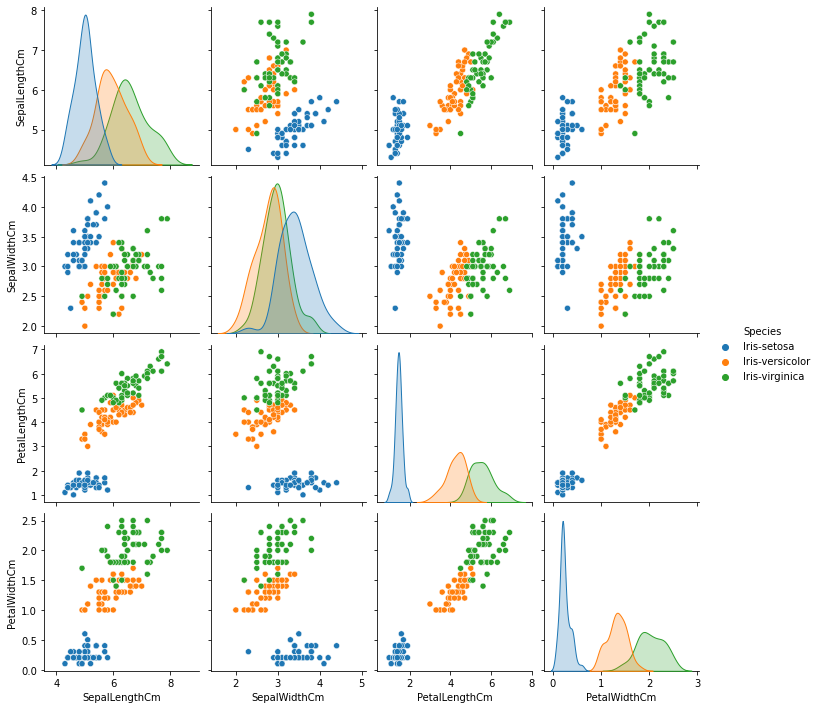

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла
iris_data = pd.read_csv("Iris.csv")

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show()

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

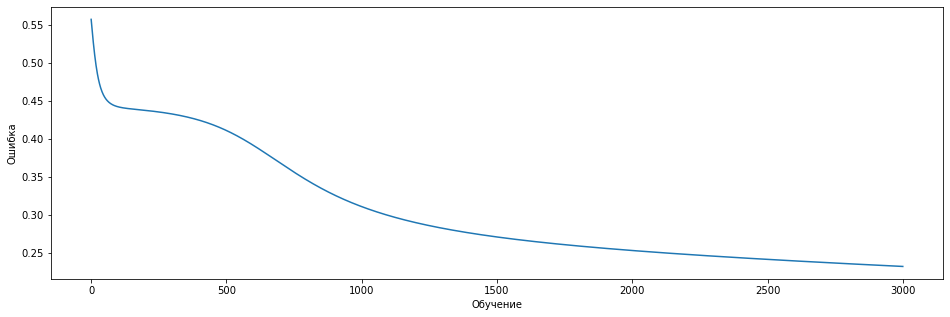

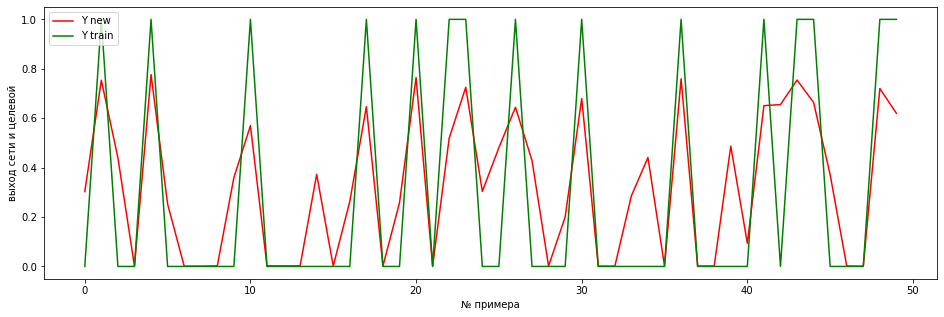

Аккуратность нейронной сети 76.74%


In [4]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5


# присваивание случайных весов
w0 = 2 * np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2 * np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
learning_rate = 0.005

# массив для ошибок, чтобы потом построить график
errors = []

# число итераций
iteration = 3000

# процесс обучения
for i in range(iteration):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * learning_rate
    w0 += layer0.T.dot(layer1_delta) * learning_rate
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# построение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

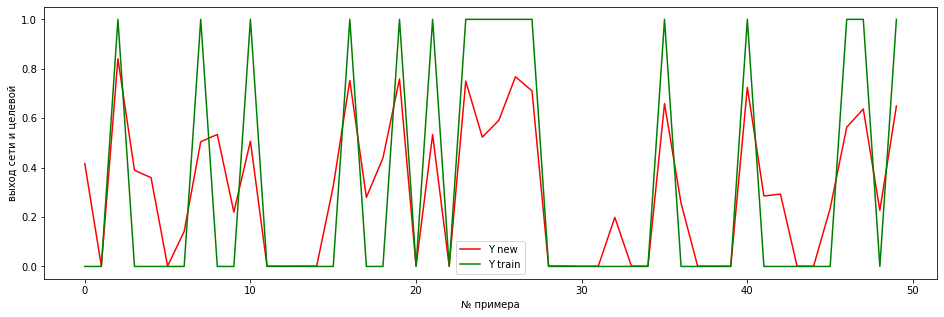

Аккуратность нейронной сети на тесте 78.44%


In [5]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() 

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

### Обученние нейронной сети для различных значений параметров

In [6]:
# Датафрейм с результатами аккуратности (accuracy) для каждого набора перебираемых параметров
name_columns = ['Число нейронов', 'Скорость обучения', 'Число итераций', 'Аккуратность сети', 'Аккуратность сети на тесте']
df_result = pd.DataFrame(columns=name_columns)
df_result

,Число нейронов,Скорость обучения,Число итераций,Аккуратность сети,Аккуратность сети на тесте


In [7]:
import datetime as dtm
print(dtm.datetime.now())

2022-03-14 13:22:19.579734


In [8]:
%%time

# определим число нейронов скрытого слоя
neuron_numb_values = [1, 5, 10, 25, 50, 100, 250]

# скорость обучения (learning rate)
learning_rate_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

# число итераций
iteration_values = [100, 250, 500, 1000, 2500, 3000, 5000, 10000, 25000, 50000]

# Индекс
count = -1

for neuron_numb in neuron_numb_values:
    # присваивание случайных весов
    w0 = 2 * np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2 * np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    for learning_rate in learning_rate_values:
        # процесс обучения
        for iteration in iteration_values:
            # Индекс
            count += 1
            for i in range(iteration):
                # прямое распространение(feed forward)
                layer0 = X_train
                layer1 = sigmoid(np.dot(layer0, w0))
                layer2 = sigmoid(np.dot(layer1, w1))

                # обратное распространение(back propagation) с использованием градиентного спуска
                layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
                layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
                layer1_error = layer2_delta.dot(w1.T)
                layer1_delta = layer1_error * sigmoid_deriv(layer1)
                # коррекция
                w1 += layer1.T.dot(layer2_delta) * learning_rate
                w0 += layer0.T.dot(layer1_delta) * learning_rate
                # массив для ошибок, чтобы потом построить график
                errors = []
                # метрика модели
                error = np.mean(np.abs(layer2_error))
                errors.append(error)
                accuracy = (1 - error) * 100

                # прямое распространение(feed forward)
                layer0_t = X_test
                layer1_t = sigmoid(np.dot(layer0_t, w0))
                layer2_t = sigmoid(np.dot(layer1_t, w1))
                layer2_error_t = y_test - layer2_t

                # метрика модели
                error_t = np.mean(np.abs(layer2_error_t))
                accuracy_test = (1 - error_t) * 100

            dict_result = {'Число нейронов': neuron_numb, 
                       'Скорость обучения': learning_rate, 
                       'Число итераций': iteration, 
                       'Аккуратность сети': accuracy, 
                       'Аккуратность сети на тесте': accuracy_test}
    
            df_result = pd.concat([df_result, pd.DataFrame(dict_result, index=[count])])

Wall time: 15min 54s


In [9]:
df_result

,Число нейронов,Скорость обучения,Число итераций,Аккуратность сети,Аккуратность сети на тесте
0,1,0.001,100,50.064063,50.414955
1,1,0.001,250,51.127832,51.361621
2,1,0.001,500,53.277269,53.356589
3,1,0.001,1000,55.420141,55.265218
4,1,0.001,2500,55.642177,55.350171
...,...,...,...,...,...
485,250,1.000,3000,99.291101,99.137510
486,250,1.000,5000,99.292576,99.133640
487,250,1.000,10000,99.295103,99.127581
488,250,1.000,25000,99.299766,99.118571


In [10]:
# Наилучшие параметры (по максимальному значению аккуратности на тесте)
df_result[df_result['Аккуратность сети на тесте'] == df_result['Аккуратность сети на тесте'].max()]

,Число нейронов,Скорость обучения,Число итераций,Аккуратность сети,Аккуратность сети на тесте
120,5,0.5,100,96.830979,99.956981


In [11]:
# 5 наборов параметров для наиболее точных результатов (по значению аккуратности на тесте)
df_result.sort_values(by='Аккуратность сети на тесте').tail(5)

,Число нейронов,Скорость обучения,Число итераций,Аккуратность сети,Аккуратность сети на тесте
121,5,0.5,250,94.291184,99.859647
472,250,0.5,500,96.938592,99.884407
474,250,0.5,2500,99.176675,99.897351
123,5,0.5,1000,97.859510,99.939734
120,5,0.5,100,96.830979,99.956981


### Исследуем влияние каждого параметра

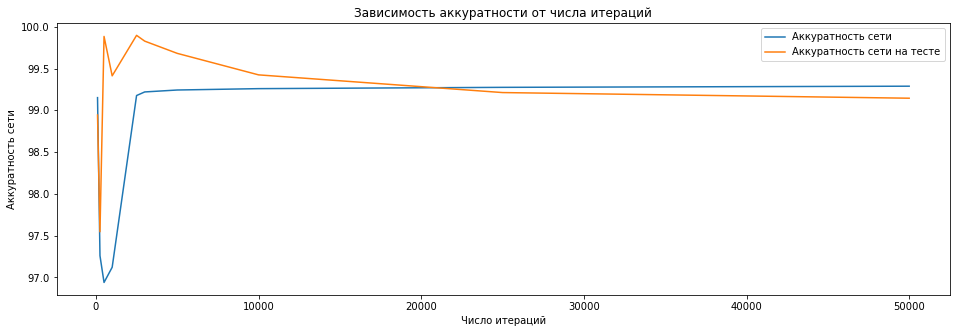

,Число нейронов,Скорость обучения,Число итераций,Аккуратность сети,Аккуратность сети на тесте
470,250,0.5,100,99.151663,98.943104
471,250,0.5,250,97.258598,97.545598
472,250,0.5,500,96.938592,99.884407
473,250,0.5,1000,97.120168,99.412603
474,250,0.5,2500,99.176675,99.897351
475,250,0.5,3000,99.219746,99.828245
476,250,0.5,5000,99.242913,99.681816
477,250,0.5,10000,99.259232,99.424198
478,250,0.5,25000,99.274748,99.212271
479,250,0.5,50000,99.288600,99.144685


In [12]:
# Зафиксируем число нейронов и скорость обучения для оценки влияния числа итераций на результат
df_for_iteration = df_result[(df_result['Число нейронов'] == 250) & (df_result['Скорость обучения'] == 0.5)]
plt.figure(figsize = (16,5))
plt.plot(df_for_iteration['Число итераций'], df_for_iteration['Аккуратность сети'], label = 'Аккуратность сети')
plt.plot(df_for_iteration['Число итераций'], df_for_iteration['Аккуратность сети на тесте'],  label = 'Аккуратность сети на тесте')
plt.xlabel('Число итераций')
plt.ylabel('Аккуратность сети')
plt.legend()
plt.title('Зависимость аккуратности от числа итераций')
plt.show()
df_for_iteration

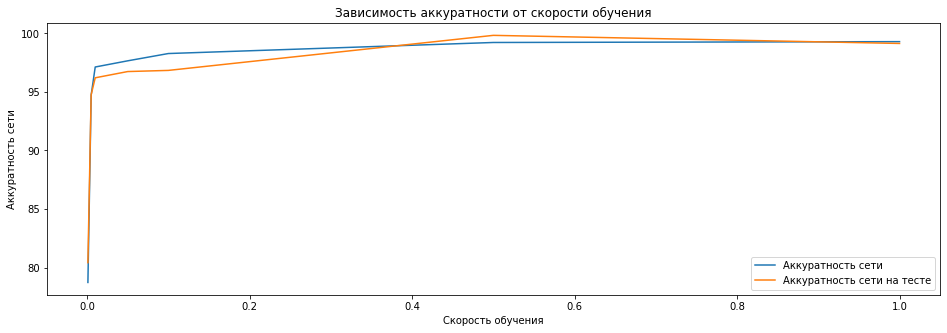

,Число нейронов,Скорость обучения,Число итераций,Аккуратность сети,Аккуратность сети на тесте
425,250,0.001,3000,78.735305,80.424438
435,250,0.005,3000,94.726126,94.761520
445,250,0.010,3000,97.126645,96.204491
455,250,0.050,3000,97.654530,96.738264
465,250,0.100,3000,98.276384,96.836237
475,250,0.500,3000,99.219746,99.828245
485,250,1.000,3000,99.291101,99.137510


In [13]:
# Зафиксируем число нейронов и число итераций для оценки влияния скорости обучения на результат
df_for_learning = df_result[(df_result['Число нейронов'] == 250) & (df_result['Число итераций'] == 3000)]
plt.figure(figsize = (16,5))
plt.plot(df_for_learning['Скорость обучения'], df_for_learning['Аккуратность сети'], label = 'Аккуратность сети')
plt.plot(df_for_learning['Скорость обучения'], df_for_learning['Аккуратность сети на тесте'],  label = 'Аккуратность сети на тесте')
plt.xlabel('Скорость обучения')
plt.ylabel('Аккуратность сети')
plt.legend()
plt.title('Зависимость аккуратности от скорости обучения')
plt.show()
df_for_learning

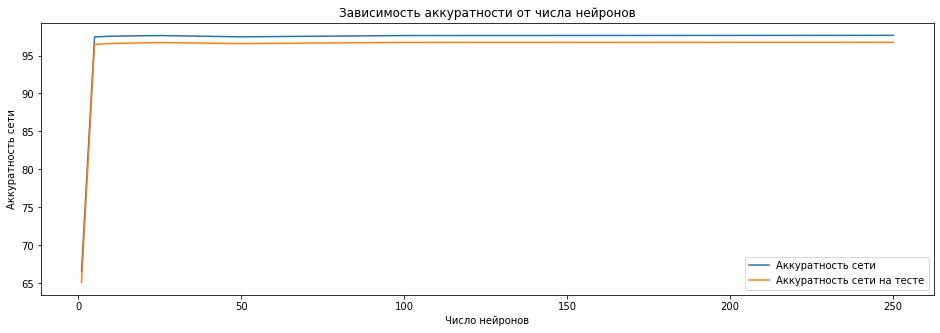

,Число нейронов,Скорость обучения,Число итераций,Аккуратность сети,Аккуратность сети на тесте
35,1,0.05,3000,66.596486,65.117823
105,5,0.05,3000,97.447035,96.465801
175,10,0.05,3000,97.545287,96.573163
245,25,0.05,3000,97.628434,96.706465
315,50,0.05,3000,97.460809,96.565018
385,100,0.05,3000,97.627975,96.725325
455,250,0.05,3000,97.654530,96.738264


In [14]:
# Зафиксируем скорость обучения и число итераций для оценки влияния числа нейронов на результат
df_for_neurons = df_result[(df_result['Скорость обучения'] == 0.05) & (df_result['Число итераций'] == 3000)]
plt.figure(figsize = (16,5))
plt.plot(df_for_neurons['Число нейронов'], df_for_neurons['Аккуратность сети'], label = 'Аккуратность сети')
plt.plot(df_for_neurons['Число нейронов'], df_for_neurons['Аккуратность сети на тесте'],  label = 'Аккуратность сети на тесте')
plt.xlabel('Число нейронов')
plt.ylabel('Аккуратность сети')
plt.legend()
plt.title('Зависимость аккуратности от числа нейронов')
plt.show()
df_for_neurons

Выводы: 
1. Для данного набора данных наиболее оптимальные параметры: 
        Число нейронов = 5	
        Скорость обучения = 0.5	
        Число итераций = 100
        Результат на тесте: accuracy = 99.956981
2. Увеличение числа нейронов сети приводит к увеличению значения аккуратности, но для данного набора данных при количестве нейронов более 25 прирост в качестве незначительный
3. Увеличение скорости обучения до 0.5 в данном случае приводит к увеличению значения аккуратности. При значении скорости обучения 1.0 значение метрики на тесте уменьшилось, что может свидетельствовать о переобучении. 
4. Увеличение числа итераций приводит к увеличению значения аккуратности. При фиксированных параметрах скорости обучения и числа нейронов и числе итераций 2500 модель показала наибольшее значение аккуратности, после этого метрика на тесте начала уменьшаться, вероятно, модель начала переобучаться